# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns
import pandas as pd

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
fitbit = pd.read_csv('../data/Fitbit2.csv')

fitbit.head(20)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
5,2015-05-13,276,779,5.79,15,726.000,172,34,18,1094,...,3.597738,Wednesday,2.0,1,6.750000,88.621444,6.783333,82.892057,May,5
6,2015-05-14,2687,5614,4.17,2,782.000,216,13,1,9830,...,2.591117,Thursday,3.0,1,6.350000,91.807229,6.750000,88.621444,May,5
7,2015-05-15,2793,8169,6.07,14,801.000,218,8,7,1092,...,3.771722,Friday,4.0,1,4.483333,87.908497,6.350000,91.807229,May,5
8,2015-05-16,4061,19971,14.84,18,532.000,247,101,118,27,...,9.221146,Saturday,5.0,0,7.533333,89.151874,4.483333,87.908497,May,5
9,2015-05-17,3349,852,6.33,12,606.000,186,46,73,1766,...,3.933278,Sunday,6.0,0,4.483333,92.439863,7.533333,89.151874,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [3]:
plt.rcParams['figure.figsize']=(12,4)

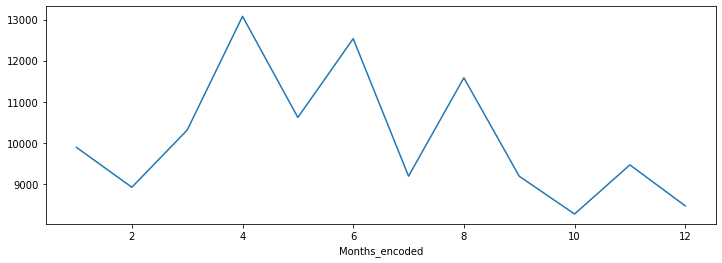

In [4]:
fitbit.groupby('Months_encoded').Steps.mean().plot();

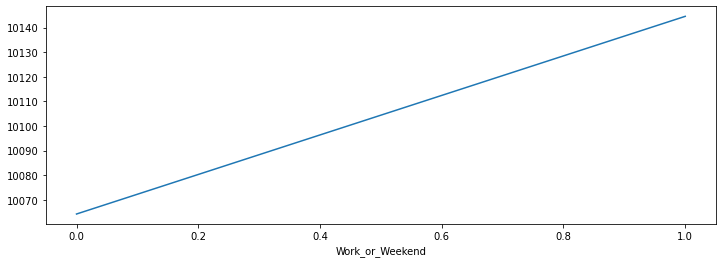

In [5]:
fitbit.groupby('Work_or_Weekend').Steps.mean().plot();

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

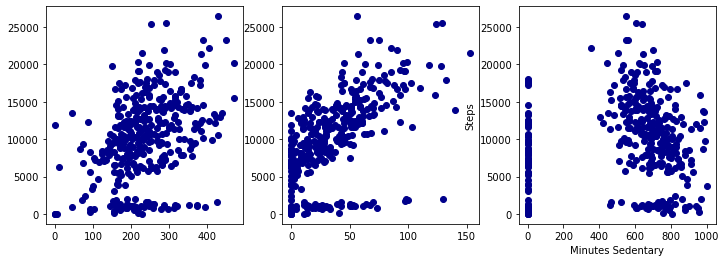

In [6]:
fig, ax = plt.subplots(1, 3)

lst = [fitbit['Minutes Lightly Active'], fitbit['Minutes Very Active'], fitbit['Minutes Sedentary'], fitbit['Steps']]
features = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for i in range(3):
    
    ax[i].scatter(x=lst[i], y=lst[3], color='darkblue')

    plt.xlabel(features[i])
    plt.ylabel('Steps')

plt.show()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [7]:
titanic = pd.read_csv('../data/titanic.csv')

titanic.head(20)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
5,6,0.0,3,"Moran, Mr. James",male,23.926502,0,0,330877,8.4583,U0,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U0,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U0,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,U0,C


#### Explore the titanic dataset using Pandas dtypes.

In [8]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [9]:
titanic.select_dtypes('number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [10]:
titanic.select_dtypes('object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [11]:
plt.rcParams['figure.figsize']=(12,6)
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

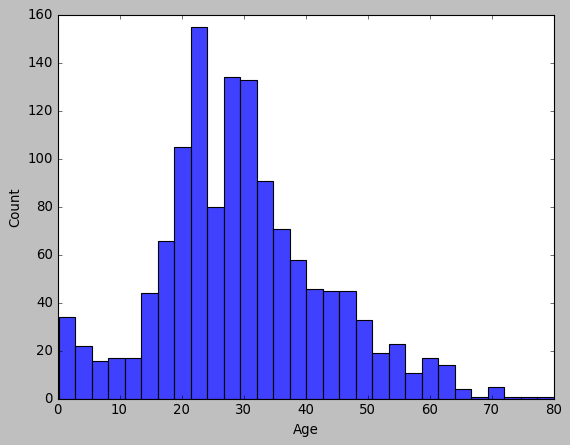

In [12]:
sns.histplot(x = titanic.Age);

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

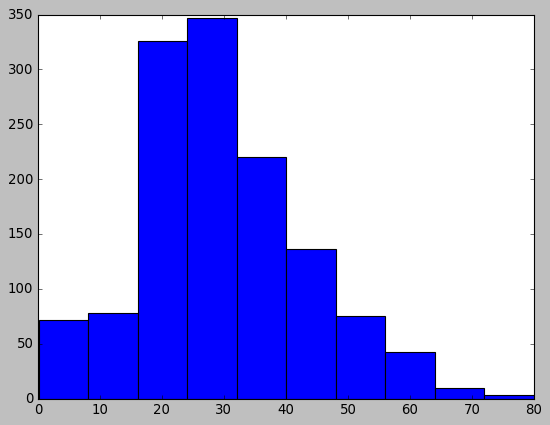

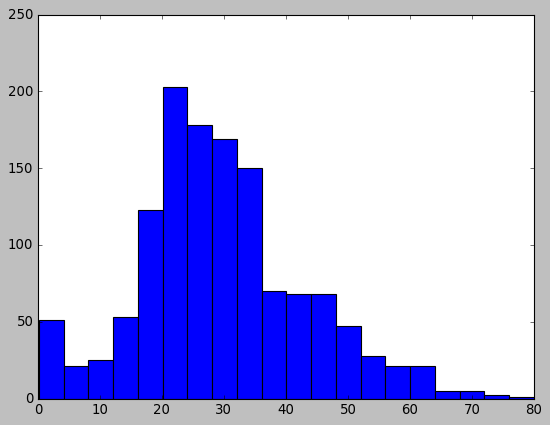

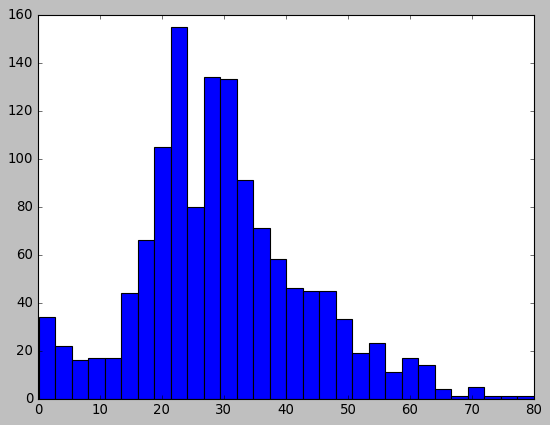

In [31]:
barras = [10,20,30]

for i in range(3):
    
    plt.hist(titanic.Age, bins=barras[i])
    plt.show()

#### How does the bin size affect your plot?

In [33]:
"""
Es el número de barras que vemos en el gráfico, va cambiando la escala
"""

'\nEs el número de barras que vemos en el gráfico, va cambiando la escala\n'

#### Use seaborn to show the distribution of column `Age`.

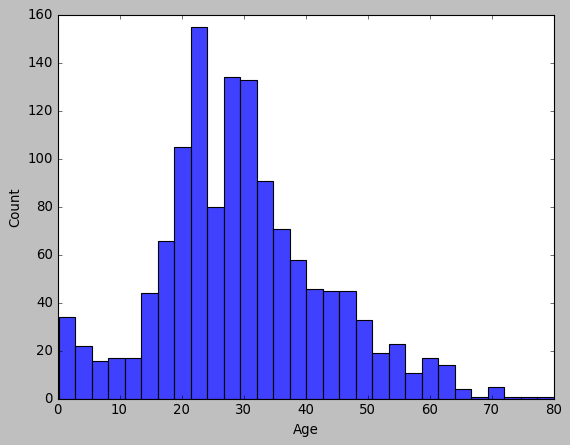

In [35]:
sns.histplot(x = titanic.Age);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

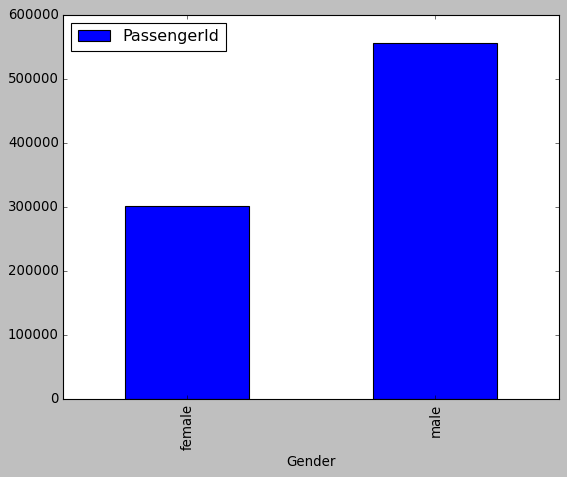

In [41]:
titanic.groupby(['Gender']).sum().plot(kind = 'bar', y = 'PassengerId');

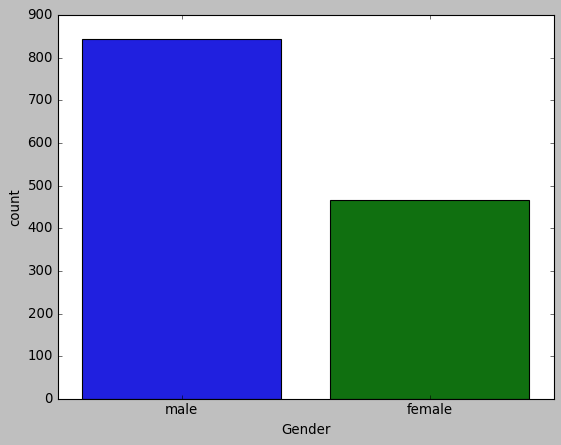

In [42]:
sns.countplot(x = titanic.Gender);

#### Use the right plot to visualize the column `Pclass`.

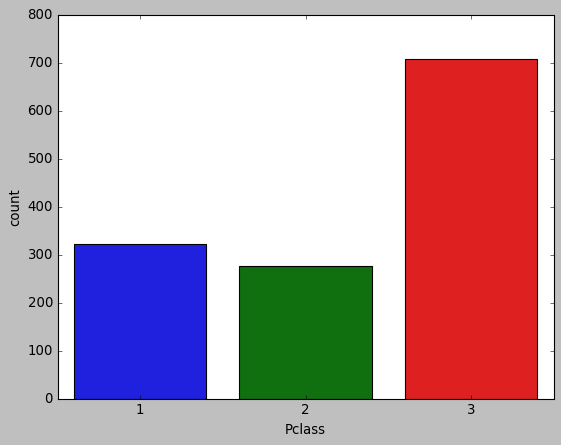

In [45]:
sns.countplot(x = titanic.Pclass);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

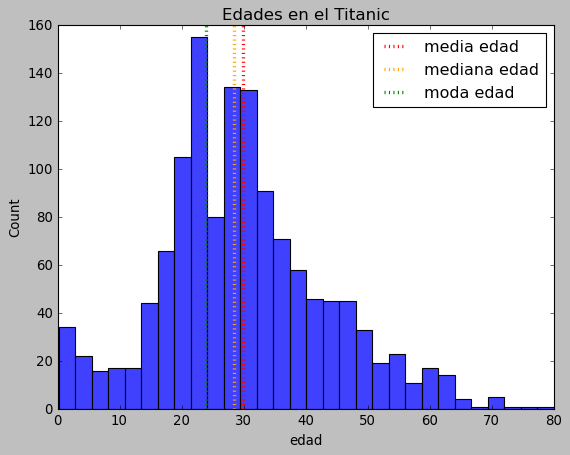

In [51]:
sns.histplot(x = titanic.Age)

# media
plt.axvline(titanic.Age.mean(),
            c = 'r',
            linewidth = 3.,
            linestyle = ':',
            label = 'media edad')

# mediana
plt.axvline(titanic.Age.median(),
            c = 'orange',
            linewidth = 3.,
            linestyle = ':',
            label = 'mediana edad')    

# moda
plt.axvline(titanic.Age.mode()[0],
            c = 'green',
            linewidth = 3.,
            linestyle =':',
            label = 'moda edad')     

plt.title('Edades en el Titanic', size=15)
plt.xlabel('edad')
plt.legend()
plt.show();

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

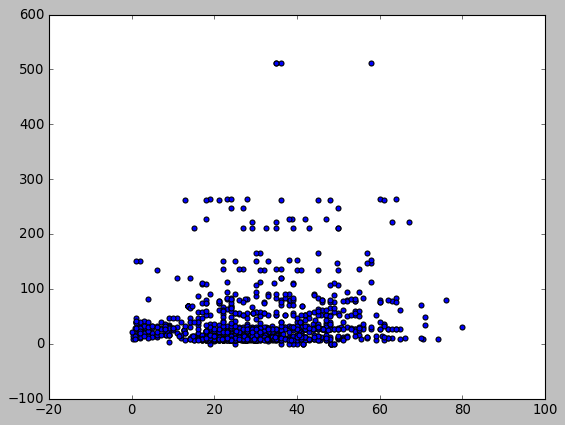

In [55]:
plt.scatter(y = 'Fare', x = 'Age', data = titanic);

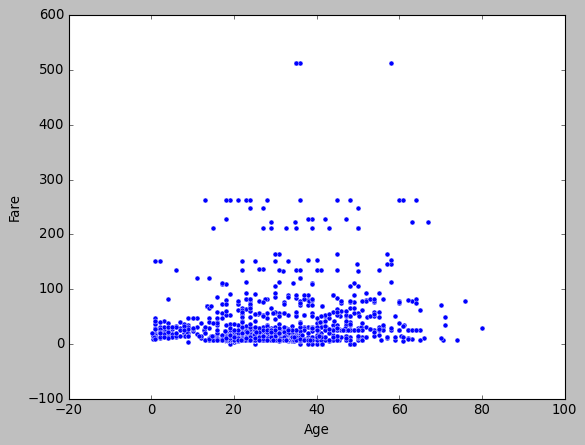

In [54]:
sns.scatterplot(data = titanic, y = 'Fare', x = 'Age');

#### Plot the correlation matrix using seaborn.

In [56]:
corr=titanic.corr(method='pearson')
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


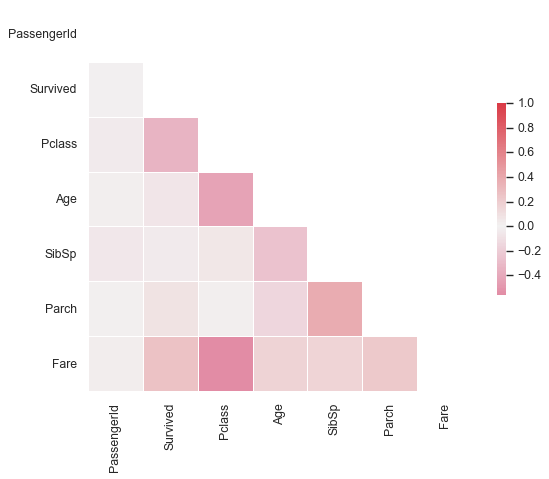

In [64]:
sns.set(style = 'whitegrid')

mascara = np.triu(np.ones_like(corr, dtype = bool))

cmap = sns.diverging_palette(0, 10, as_cmap = True)

sns.heatmap(corr,
            mask = mascara,
            cmap = cmap,
            vmax = 1,
            center = 0,
            square = True,
            linewidths = 0.5,
            cbar_kws = {'shrink':0.5}
           );

#### What are the most correlated features?

In [65]:
"""
Sin duda la que más relacionada está es Pclass-Fare, el precio del billete junto a la clase en la que se viaja
"""

'\nSin duda la que más relacionada está es Pclass-Fare, el precio del billete junto a la clase en la que se viaja\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

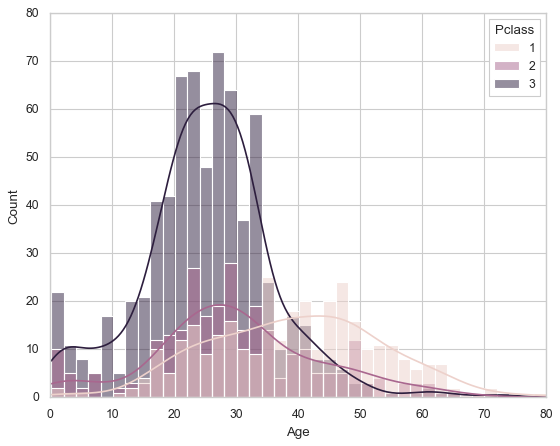

In [66]:
sns.histplot(x = titanic.Age, 
             hue = titanic.Pclass,
             bins = 40,
             kde = True
            );

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

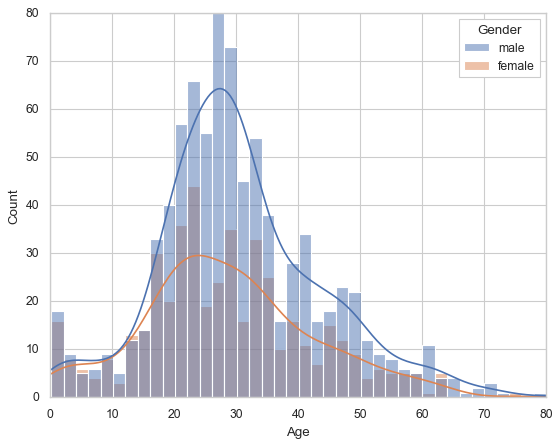

In [67]:
sns.histplot(x = titanic.Age, 
             hue = titanic.Gender,
             bins = 40,
             kde = True
            );